# Pizza Sales Python Project

This analysis uses data from [this Kaggle dataset](https://www.kaggle.com/datasets/mysarahmadbhat/pizza-place-sales). The dataset has four csv files containing different information about sales from a pizza restraurant, including the price, number of pizzas in an order, and type of pizza ordered. I merge the datasets, and visualize information about the months, pizzas, and days of months that are associated with higher revenue.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df_order_details = pd.read_csv(r"C:\Users\Razia\Documents\pizza\order_details.csv")
df_orders = pd.read_csv(r"C:\Users\Razia\Documents\pizza\orders.csv")
df_pizza_types = pd.read_csv(r"C:\Users\Razia\Documents\pizza\pizza_types.csv", encoding='unicode_escape')
df_pizzas = pd.read_csv(r"C:\Users\Razia\Documents\pizza\pizzas.csv")

df_order_details

,order_details_id,order_id,pizza_id,quantity
0,1,1,hawaiian_m,1
1,2,2,classic_dlx_m,1
2,3,2,five_cheese_l,1
3,4,2,ital_supr_l,1
4,5,2,mexicana_m,1
...,...,...,...,...
48615,48616,21348,ckn_alfredo_m,1
48616,48617,21348,four_cheese_l,1
48617,48618,21348,napolitana_s,1
48618,48619,21349,mexicana_l,1


In [3]:
df_orders

,order_id,date,time
0,1,2015-01-01,11:38:36
1,2,2015-01-01,11:57:40
2,3,2015-01-01,12:12:28
3,4,2015-01-01,12:16:31
4,5,2015-01-01,12:21:30
...,...,...,...
21345,21346,2015-12-31,20:51:07
21346,21347,2015-12-31,21:14:37
21347,21348,2015-12-31,21:23:10
21348,21349,2015-12-31,22:09:54


In [4]:
df_pizza_types

,pizza_type_id,name,category,ingredients
0,bbq_ckn,The Barbecue Chicken Pizza,Chicken,"Barbecued Chicken, Red Peppers, Green Peppers,..."
1,cali_ckn,The California Chicken Pizza,Chicken,"Chicken, Artichoke, Spinach, Garlic, Jalapeno ..."
2,ckn_alfredo,The Chicken Alfredo Pizza,Chicken,"Chicken, Red Onions, Red Peppers, Mushrooms, A..."
3,ckn_pesto,The Chicken Pesto Pizza,Chicken,"Chicken, Tomatoes, Red Peppers, Spinach, Garli..."
4,southw_ckn,The Southwest Chicken Pizza,Chicken,"Chicken, Tomatoes, Red Peppers, Red Onions, Ja..."
5,thai_ckn,The Thai Chicken Pizza,Chicken,"Chicken, Pineapple, Tomatoes, Red Peppers, Tha..."
6,big_meat,The Big Meat Pizza,Classic,"Bacon, Pepperoni, Italian Sausage, Chorizo Sau..."
7,classic_dlx,The Classic Deluxe Pizza,Classic,"Pepperoni, Mushrooms, Red Onions, Red Peppers,..."
8,hawaiian,The Hawaiian Pizza,Classic,"Sliced Ham, Pineapple, Mozzarella Cheese"
9,ital_cpcllo,The Italian Capocollo Pizza,Classic,"Capocollo, Red Peppers, Tomatoes, Goat Cheese,..."


In [5]:
df_pizzas

,pizza_id,pizza_type_id,size,price
0,bbq_ckn_s,bbq_ckn,S,12.75
1,bbq_ckn_m,bbq_ckn,M,16.75
2,bbq_ckn_l,bbq_ckn,L,20.75
3,cali_ckn_s,cali_ckn,S,12.75
4,cali_ckn_m,cali_ckn,M,16.75
...,...,...,...,...
91,spinach_fet_m,spinach_fet,M,16.00
92,spinach_fet_l,spinach_fet,L,20.25
93,veggie_veg_s,veggie_veg,S,12.00
94,veggie_veg_m,veggie_veg,M,16.00


# Merge Dataframes

In [6]:
df = df_order_details.merge(df_pizzas, how = 'inner', on = 'pizza_id')
df

,order_details_id,order_id,pizza_id,quantity,pizza_type_id,size,price
0,1,1,hawaiian_m,1,hawaiian,M,13.25
1,179,77,hawaiian_m,1,hawaiian,M,13.25
2,357,146,hawaiian_m,1,hawaiian,M,13.25
3,389,163,hawaiian_m,1,hawaiian,M,13.25
4,568,247,hawaiian_m,1,hawaiian,M,13.25
...,...,...,...,...,...,...,...
48615,39733,17492,the_greek_xxl,1,the_greek,XXL,35.95
48616,41183,18139,the_greek_xxl,1,the_greek,XXL,35.95
48617,42718,18789,the_greek_xxl,1,the_greek,XXL,35.95
48618,43041,18919,the_greek_xxl,1,the_greek,XXL,35.95


In [7]:
df = df.merge(df_orders, how = 'inner', on = 'order_id')
df

,order_details_id,order_id,pizza_id,quantity,pizza_type_id,size,price,date,time
0,1,1,hawaiian_m,1,hawaiian,M,13.25,2015-01-01,11:38:36
1,179,77,hawaiian_m,1,hawaiian,M,13.25,2015-01-02,12:22:46
2,178,77,bbq_ckn_m,1,bbq_ckn,M,16.75,2015-01-02,12:22:46
3,357,146,hawaiian_m,1,hawaiian,M,13.25,2015-01-03,14:22:10
4,355,146,cali_ckn_l,1,cali_ckn,L,20.75,2015-01-03,14:22:10
...,...,...,...,...,...,...,...,...,...
48615,5902,2614,the_greek_xxl,1,the_greek,XXL,35.95,2015-02-13,13:52:26
48616,9845,4307,the_greek_xxl,1,the_greek,XXL,35.95,2015-03-14,13:19:35
48617,13780,6038,the_greek_xxl,1,the_greek,XXL,35.95,2015-04-12,11:51:07
48618,36508,16119,the_greek_xxl,1,the_greek,XXL,35.95,2015-09-29,12:25:02


In [8]:
df = df.merge(df_pizza_types, how = 'inner', on = 'pizza_type_id')
df.sort_values(by = 'order_details_id', inplace = True)
df

,order_details_id,order_id,pizza_id,quantity,pizza_type_id,size,price,date,time,name,category,ingredients
0,1,1,hawaiian_m,1,hawaiian,M,13.25,2015-01-01,11:38:36,The Hawaiian Pizza,Classic,"Sliced Ham, Pineapple, Mozzarella Cheese"
42430,2,2,classic_dlx_m,1,classic_dlx,M,16.00,2015-01-01,11:57:40,The Classic Deluxe Pizza,Classic,"Pepperoni, Mushrooms, Red Onions, Red Peppers,..."
15532,3,2,five_cheese_l,1,five_cheese,L,18.50,2015-01-01,11:57:40,The Five Cheese Pizza,Veggie,"Mozzarella Cheese, Provolone Cheese, Smoked Go..."
26335,4,2,ital_supr_l,1,ital_supr,L,20.75,2015-01-01,11:57:40,The Italian Supreme Pizza,Supreme,"Calabrese Salami, Capocollo, Tomatoes, Red Oni..."
31544,5,2,mexicana_m,1,mexicana,M,16.00,2015-01-01,11:57:40,The Mexicana Pizza,Veggie,"Tomatoes, Red Peppers, Jalapeno Peppers, Red O..."
...,...,...,...,...,...,...,...,...,...,...,...,...
45373,48616,21348,ckn_alfredo_m,1,ckn_alfredo,M,16.75,2015-12-31,21:23:10,The Chicken Alfredo Pizza,Chicken,"Chicken, Red Onions, Red Peppers, Mushrooms, A..."
8655,48617,21348,four_cheese_l,1,four_cheese,L,17.95,2015-12-31,21:23:10,The Four Cheese Pizza,Veggie,"Ricotta Cheese, Gorgonzola Piccante Cheese, Mo..."
46643,48618,21348,napolitana_s,1,napolitana,S,12.00,2015-12-31,21:23:10,The Napolitana Pizza,Classic,"Tomatoes, Anchovies, Green Olives, Red Onions,..."
32958,48619,21349,mexicana_l,1,mexicana,L,20.25,2015-12-31,22:09:54,The Mexicana Pizza,Veggie,"Tomatoes, Red Peppers, Jalapeno Peppers, Red O..."


# Change Index

Below I ensure that column 'order_details_id' has only unique values, and then set that as index.

In [9]:
df[df[['order_details_id']].duplicated(keep = False)]

,order_details_id,order_id,pizza_id,quantity,pizza_type_id,size,price,date,time,name,category,ingredients


In [10]:
df.set_index('order_details_id', inplace = True)
df

,order_id,pizza_id,quantity,pizza_type_id,size,price,date,time,name,category,ingredients
order_details_id,,,,,,,,,,,
1,1,hawaiian_m,1,hawaiian,M,13.25,2015-01-01,11:38:36,The Hawaiian Pizza,Classic,"Sliced Ham, Pineapple, Mozzarella Cheese"
2,2,classic_dlx_m,1,classic_dlx,M,16.00,2015-01-01,11:57:40,The Classic Deluxe Pizza,Classic,"Pepperoni, Mushrooms, Red Onions, Red Peppers,..."
3,2,five_cheese_l,1,five_cheese,L,18.50,2015-01-01,11:57:40,The Five Cheese Pizza,Veggie,"Mozzarella Cheese, Provolone Cheese, Smoked Go..."
4,2,ital_supr_l,1,ital_supr,L,20.75,2015-01-01,11:57:40,The Italian Supreme Pizza,Supreme,"Calabrese Salami, Capocollo, Tomatoes, Red Oni..."
5,2,mexicana_m,1,mexicana,M,16.00,2015-01-01,11:57:40,The Mexicana Pizza,Veggie,"Tomatoes, Red Peppers, Jalapeno Peppers, Red O..."
...,...,...,...,...,...,...,...,...,...,...,...
48616,21348,ckn_alfredo_m,1,ckn_alfredo,M,16.75,2015-12-31,21:23:10,The Chicken Alfredo Pizza,Chicken,"Chicken, Red Onions, Red Peppers, Mushrooms, A..."
48617,21348,four_cheese_l,1,four_cheese,L,17.95,2015-12-31,21:23:10,The Four Cheese Pizza,Veggie,"Ricotta Cheese, Gorgonzola Piccante Cheese, Mo..."
48618,21348,napolitana_s,1,napolitana,S,12.00,2015-12-31,21:23:10,The Napolitana Pizza,Classic,"Tomatoes, Anchovies, Green Olives, Red Onions,..."


# Create Columns for Plots

In [11]:
df['datetime'] = pd.to_datetime(df['date'] + ' ' + df['time'])
df

,order_id,pizza_id,quantity,pizza_type_id,size,price,date,time,name,category,ingredients,datetime
order_details_id,,,,,,,,,,,,
1,1,hawaiian_m,1,hawaiian,M,13.25,2015-01-01,11:38:36,The Hawaiian Pizza,Classic,"Sliced Ham, Pineapple, Mozzarella Cheese",2015-01-01 11:38:36
2,2,classic_dlx_m,1,classic_dlx,M,16.00,2015-01-01,11:57:40,The Classic Deluxe Pizza,Classic,"Pepperoni, Mushrooms, Red Onions, Red Peppers,...",2015-01-01 11:57:40
3,2,five_cheese_l,1,five_cheese,L,18.50,2015-01-01,11:57:40,The Five Cheese Pizza,Veggie,"Mozzarella Cheese, Provolone Cheese, Smoked Go...",2015-01-01 11:57:40
4,2,ital_supr_l,1,ital_supr,L,20.75,2015-01-01,11:57:40,The Italian Supreme Pizza,Supreme,"Calabrese Salami, Capocollo, Tomatoes, Red Oni...",2015-01-01 11:57:40
5,2,mexicana_m,1,mexicana,M,16.00,2015-01-01,11:57:40,The Mexicana Pizza,Veggie,"Tomatoes, Red Peppers, Jalapeno Peppers, Red O...",2015-01-01 11:57:40
...,...,...,...,...,...,...,...,...,...,...,...,...
48616,21348,ckn_alfredo_m,1,ckn_alfredo,M,16.75,2015-12-31,21:23:10,The Chicken Alfredo Pizza,Chicken,"Chicken, Red Onions, Red Peppers, Mushrooms, A...",2015-12-31 21:23:10
48617,21348,four_cheese_l,1,four_cheese,L,17.95,2015-12-31,21:23:10,The Four Cheese Pizza,Veggie,"Ricotta Cheese, Gorgonzola Piccante Cheese, Mo...",2015-12-31 21:23:10
48618,21348,napolitana_s,1,napolitana,S,12.00,2015-12-31,21:23:10,The Napolitana Pizza,Classic,"Tomatoes, Anchovies, Green Olives, Red Onions,...",2015-12-31 21:23:10


In [12]:
df_price_time = df[['price','datetime']].rename(columns = {'price':'Revenue','datetime':'Month'}).groupby(pd.Grouper(key = 'Month', freq = 'M')).sum()
df_price_time

,Revenue
Month,
2015-01-31,68472.70
2015-02-28,64067.40
2015-03-31,69198.00
2015-04-30,67286.20
2015-05-31,69939.35
2015-06-30,66796.30
2015-07-31,71027.45
2015-08-31,67068.80
2015-09-30,63018.00


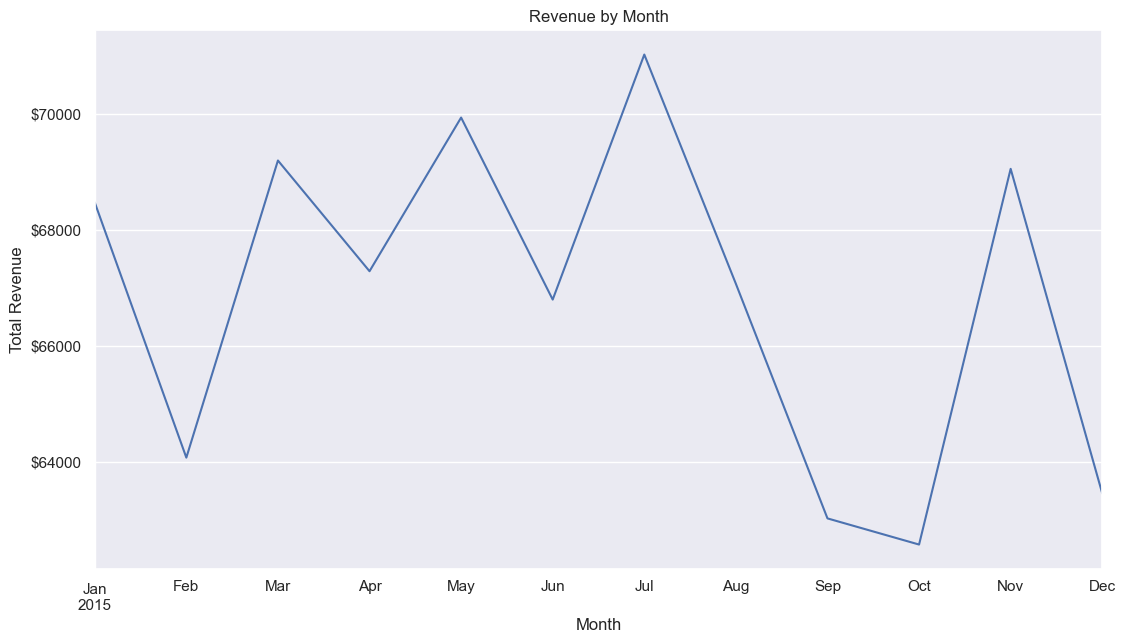

In [13]:
sns.set_theme()
ax = df_price_time.plot(figsize = (13,7), legend = False)
ax.yaxis.set_major_formatter('${x:.0f}')
plt.title('Revenue by Month')
plt.ylabel('Total Revenue')
plt.show()

In [14]:
df_pizza = df.groupby(['category','name']).agg({'price':'sum','quantity':'sum'})
df_pizza

price  quantity
category name                                                          
Chicken  The Barbecue Chicken Pizza                  41683.00      2432
         The California Chicken Pizza                40166.50      2370
         The Chicken Alfredo Pizza                   16779.00       987
         The Chicken Pesto Pizza                     16484.75       973
         The Southwest Chicken Pizza                 34081.75      1917
         The Thai Chicken Pizza                      42332.25      2371
Classic  The Big Meat Pizza                          21732.00      1914
         The Classic Deluxe Pizza                    37631.50      2453
         The Greek Pizza                             28170.10      1420
         The Hawaiian Pizza                          31561.75      2422
         The Italian Capocollo Pizza                 24641.50      1438
         The Napolitana Pizza                        23850.50      1464
         The Pepperoni Pizza                         29538.25      2418
         The Pepperoni, Mushroom, and Peppers Pizza  18607.00      1359
Supreme  The Brie Carre Pizza                        11352.00       490
         The Calabrese Pizza                         15763.75       937
         The Italian Supreme Pizza                   32856.25      1884
         The Pepper Salami Pizza                     25081.00      1446
         The Prosciutto and Arugula Pizza            23679.75      1457
         The Sicilian Pizza                          30123.75      1938
         The Soppressata Pizza                       16342.75       961
         The Spicy Italian Pizza                     34163.50      1924
         The Spinach Supreme Pizza                   15124.00       950
Veggie   The Five Cheese Pizza                       25141.50      1409
         The Four Cheese Pizza                       31361.10      1902
         The Green Garden Pizza                      13819.50       997
         The Italian Vegetables Pizza                15930.75       981
         The Mediterranean Pizza                     15163.00       934
         The Mexicana Pizza                          26243.00      1484
         The Spinach Pesto Pizza                     15388.25       970
         The Spinach and Feta Pizza                  23021.25      1446
         The Vegetables + Vegetables Pizza           24129.75      1526

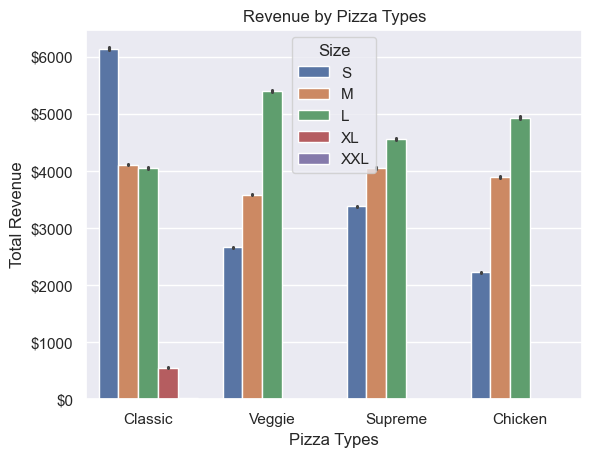

In [15]:
ax = sns.barplot(df, x = 'category', y = 'quantity', estimator = 'sum', hue = 'size', hue_order = ['S','M','L','XL','XXL'])
ax.yaxis.set_major_formatter('${x:.0f}')
plt.title('Revenue by Pizza Types')
plt.xlabel('Pizza Types')
plt.ylabel('Total Revenue')
plt.legend(title = 'Size')
plt.show()

In [16]:
df['day'] = df.datetime.dt.day
df['month'] = df.datetime.dt.month
df_calendar = df[['month','day','quantity']].groupby(['month','day']).sum()
df_calendar = df_calendar.pivot_table(index = 'month', columns = 'day', values = 'quantity')

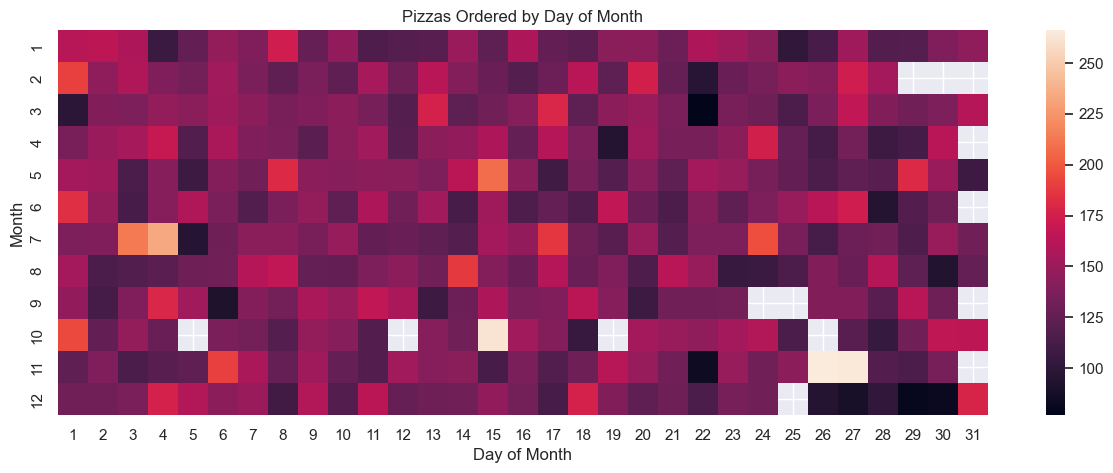

In [17]:
plt.rcParams['figure.figsize'] = (15,5)
sns.heatmap(df_calendar)
plt.title('Pizzas Ordered by Day of Month')
plt.xlabel('Day of Month')
plt.ylabel('Month')
plt.show()